<a href="https://colab.research.google.com/github/raven-gith/machinelearning1/blob/main/03.Chapter%2003/chapter_03_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3: Classification

Notebook ini mereproduksi proses klasifikasi dari Bab 3 buku _Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow_ oleh Aurélien Géron.

Fokus utama:
- Dataset MNIST (digit 0-9)
- Binary classification
- Evaluasi model klasifikasi
- Confusion matrix, precision, recall, dan ROC


In [1]:

from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]
y = y.astype(int)

# Split data
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

# Binary classification: angka 5 atau bukan
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

# Model SGD
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(random_state=42)

In [2]:

# Cross-val score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

# Confusion matrix
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5)
conf_mx = confusion_matrix(y_train_5, y_train_pred)
conf_mx


array([[53115,  1464],
       [  916,  4505]])

In [3]:

# Precision, recall, F1-score
precision = precision_score(y_train_5, y_train_pred)
recall = recall_score(y_train_5, y_train_pred)
f1 = f1_score(y_train_5, y_train_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.7547327860613168
Recall: 0.8310274857037447
F1 Score: 0.7910447761194029


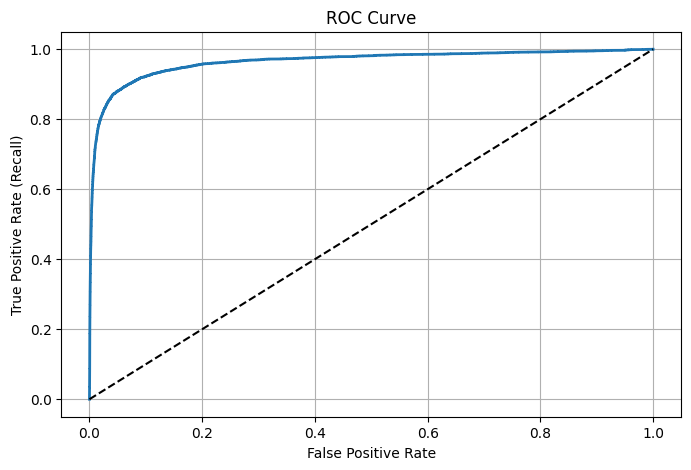

ROC AUC Score: 0.9648211175804801


In [4]:

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, method="decision_function")
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.grid(True)
plt.show()

roc_auc = roc_auc_score(y_train_5, y_scores)
print("ROC AUC Score:", roc_auc)
